In [2]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)
tf.random.set_seed(42)

In [4]:
IMAGE_SIZE = (224, 224)
train_path = 'chest_xray/train'
valid_path = 'chest_xray/test'

In [5]:
model = tf.keras.models.Sequential()

In [7]:
# SqueezeNet-like architecture
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPool2D((3, 3), strides=(2, 2)))
model.add(Conv2D(64, (1, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((3, 3), strides=(2, 2)))
model.add(Conv2D(128, (1, 1), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D((3, 3), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [8]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [9]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(train_path, target_size=IMAGE_SIZE, batch_size=10, class_mode='binary')
test_set = test_datagen.flow_from_directory(valid_path, target_size=IMAGE_SIZE, batch_size=10, class_mode='binary')

model.fit(
    training_set,
    validation_data=test_set,
    epochs=5,  # You can adjust the number of epochs
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/5
522/522 [==============================] - 209s 398ms/step - loss: 0.4020 - accuracy: 0.8217 - val_loss: 0.3865 - val_accuracy: 0.8093
Epoch 2/5
522/522 [==============================] - 228s 436ms/step - loss: 0.2255 - accuracy: 0.9153 - val_loss: 0.4179 - val_accuracy: 0.8526
Epoch 3/5
522/522 [==============================] - 240s 460ms/step - loss: 0.1943 - accuracy: 0.9250 - val_loss: 0.3967 - val_accuracy: 0.8766
Epoch 4/5
522/522 [==============================] - 240s 459ms/step - loss: 0.1894 - accuracy: 0.9289 - val_loss: 0.2746 - val_accuracy: 0.8942
Epoch 5/5
522/522 [==============================] - 244s 468ms/step - loss: 0.1564 - accuracy: 0.9402 - val_loss: 0.3858 - val_accuracy: 0.9022


In [15]:
from keras.preprocessing import image

img = image.load_img('chest_xray/test/PNEUMONIA/person1_virus_11.jpeg', target_size=IMAGE_SIZE)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = x / 255.0  # Normalize the image
classes = model.predict(img_data)
result = int(classes[0][0])
if result == 0:
    print("Person is Affected By PNEUMONIA")
else:
    print("Result is Normal")


1/1 [==============================] - 0s 48ms/step
Person is Affected By PNEUMONIA


In [16]:
true_labels = []
predicted_labels = []

for i in range(len(test_set)):
    batch = test_set[i]
    images, labels = batch
    predictions = model.predict(images)
    
    true_labels.extend(labels)  # Labels are already in the correct format (no need to use argmax)
    predicted_labels.extend(predictions)

# Convert true_labels and predicted_labels to numpy arrays
t_labels = np.array(true_labels)
p_labels = np.array(predicted_labels)

1/1 [==============================] - 0s 58ms/step


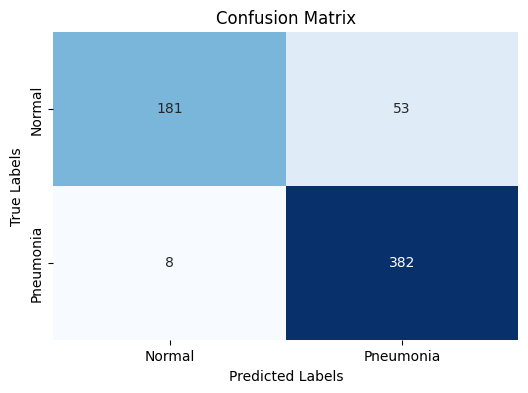

Accuracy: 0.9022435897435898


In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Convert true_labels and predicted_labels to binary labels (0 or 1)
true_labels = np.array(true_labels)
predicted_labels = (np.array(predicted_labels) > 0.5).astype(int)  # Threshold at 0.5

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(np.arange(2) + 0.5, ['Normal', 'Pneumonia'])
plt.yticks(np.arange(2) + 0.5, ['Normal', 'Pneumonia'])
plt.show()

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)


In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1_score = f1_score(true_labels, predicted_labels)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Precision: 0.8781609195402299
Recall: 0.9794871794871794
F1 Score: 0.926060606060606
